In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Getting Data from ChemBL

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

In [3]:
# Target search for TBK1
target = new_client.target
target_query = target.search('mtor')
targets = pd.DataFrame.from_dict(target_query)
targets

cross_references           organism  \
0   [{'xref_id': 'P42346', 'xref_name': None, 'xre...  Rattus norvegicus   
1                                                  []       Mus musculus   
2   [{'xref_id': 'P42345', 'xref_name': None, 'xre...       Homo sapiens   
3                                                  []       Homo sapiens   
4   [{'xref_id': 'Q6R327', 'xref_name': None, 'xre...       Homo sapiens   
5                                                  []       Homo sapiens   
6                                                  []       Homo sapiens   
7                                                  []       Homo sapiens   
8                                                  []       Homo sapiens   
9                                                  []       Homo sapiens   
10                                                 []       Homo sapiens   

                                         pref_name  score  species_group_flag  \
0             Serine/threonine-protein kinase mTOR   16.0               False   
1             Serine/threonine-protein kinase mTOR   16.0               False   
2             Serine/threonine-protein kinase mTOR   15.0               False   
3                                      DEPTOR/mTOR   15.0               False   
4          Rapamycin-insensitive companion of mTOR   14.0               False   
5                                     FKBP12A/mTOR   14.0               False   
6            Regulatory-associated protein of mTOR   13.0               False   
7   DEP domain-containing mTOR-interacting protein   13.0               False   
8                                           mTORC1   13.0               False   
9                             mTOR/FKBP12A/FKBP12B   12.0               False   
10                                          mTORC2   12.0               False   

   target_chembl_id                                  target_components  \
0     CHEMBL1075134  [{'accession': 'P42346', 'component_descriptio...   
1     CHEMBL1255165  [{'accession': 'Q9JLN9', 'component_descriptio...   
2        CHEMBL2842  [{'accession': 'P42345', 'component_descriptio...   
3     CHEMBL4523674  [{'accession': 'P42345', 'component_descriptio...   
4     CHEMBL1795179  [{'accession': 'Q6R327', 'component_descriptio...   
5     CHEMBL2221341  [{'accession': 'P62942', 'component_descriptio...   
6     CHEMBL3120040  [{'accession': 'Q8N122', 'component_descriptio...   
7     CHEMBL4105866  [{'accession': 'Q8TB45', 'component_descriptio...   
8     CHEMBL4296661  [{'accession': 'P42345', 'component_descriptio...   
9     CHEMBL4296662  [{'accession': 'P62942', 'component_descriptio...   
10    CHEMBL4523999  [{'accession': 'P42345', 'component_descriptio...   

                    target_type  tax_id  
0                SINGLE PROTEIN   10116  
1                SINGLE PROTEIN   10090  
2                SINGLE PROTEIN    9606  
3   PROTEIN-PROTEIN INTERACTION    9606  
4                SINGLE PROTEIN    9606  
5               PROTEIN COMPLEX    9606  
6                SINGLE PROTEIN    9606  
7                SINGLE PROTEIN    9606  
8               PROTEIN COMPLEX    9606  
9               PROTEIN COMPLEX    9606  
10              PROTEIN COMPLEX    9606

In [4]:
#Selecting Single protein for humans
selected_target = targets.target_chembl_id[2]
selected_target

'CHEMBL2842'

In [5]:
#fetching bioactivity data of selected 
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
bioactivity_df = pd.DataFrame.from_dict(res)
pd.set_option('display.max_columns', None)
bioactivity_df.head(10)

action_type activity_comment  activity_id activity_properties  \
0        None             None       866953                  []   
1        None             None       868131                  []   
2        None             None       873239                  []   
3        None             None       873240                  []   
4        None             None       875431                  []   
5        None             None       878003                  []   
6        None             None       880504                  []   
7        None             None       881846                  []   
8        None             None       885426                  []   
9        None             None       886875                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL682171  The inhibitory activity by using FK506 binding...   
1    CHEMBL682171  The inhibitory activity by using FK506 binding...   
2    CHEMBL682171  The inhibitory activity by using FK506 binding...   
3    CHEMBL677281  The inhibitory activity by using FK506 binding...   
4    CHEMBL682171  The inhibitory activity by using FK506 binding...   
5    CHEMBL682171  The inhibitory activity by using FK506 binding...   
6    CHEMBL682171  The inhibitory activity by using FK506 binding...   
7    CHEMBL677281  The inhibitory activity by using FK506 binding...   
8    CHEMBL682171  The inhibitory activity by using FK506 binding...   
9    CHEMBL682171  The inhibitory activity by using FK506 binding...   

  assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
0          B                    None                   None  BAO_0000190   
1          B                    None                   None  BAO_0000190   
2          B                    None                   None  BAO_0000190   
3          B                    None                   None  BAO_0000190   
4          B                    None                   None  BAO_0000190   
5          B                    None                   None  BAO_0000190   
6          B                    None                   None  BAO_0000190   
7          B                    None                   None  BAO_0000190   
8          B                    None                   None  BAO_0000190   
9          B                    None                   None  BAO_0000190   

    bao_format              bao_label  \
0  BAO_0000357  single protein format   
1  BAO_0000357  single protein format   
2  BAO_0000357  single protein format   
3  BAO_0000357  single protein format   
4  BAO_0000357  single protein format   
5  BAO_0000357  single protein format   
6  BAO_0000357  single protein format   
7  BAO_0000357  single protein format   
8  BAO_0000357  single protein format   
9  BAO_0000357  single protein format   

                                    canonical_smiles data_validity_comment  \
0  CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C                  None   
1  CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1                  None   
2       CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1                  None   
3  C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...                  None   
4  CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1...                  None   
5     O=C(C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1)c1ccccc1                  None   
6  CC(C)(C)C(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)...                  None   
7  CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...                  None   
8     CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OC(C)CN1CCCCC1                  None   
9     CC(C)(C)C(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1                  None   

  data_validity_description document_chembl_id      document_journal  \
0                      None      CHEMBL1132865  Bioorg Med Chem Lett   
1                      None      CHEMBL1132865  Bioorg Med Chem Lett   
2                      None      CHEMBL1132865  Bioorg Med Chem Lett   
3                      None      CH

In [6]:
bioactivity_df.to_csv('bioactivity_df', index=False)

# Data Pre-Processing

### Handling Missing Values

In [7]:
bioactivity_df = pd.read_csv('bioactivity_df')

In [8]:
bioactivity_df.isna().sum()

action_type                  4780
activity_comment             2574
activity_id                     0
activity_properties             0
assay_chembl_id                 0
assay_description               0
assay_type                      0
assay_variant_accession      5112
assay_variant_mutation       5112
bao_endpoint                    0
bao_format                      0
bao_label                       0
canonical_smiles                0
data_validity_comment        5108
data_validity_description    5108
document_chembl_id              0
document_journal             2476
document_year                   0
ligand_efficiency             797
molecule_chembl_id              0
molecule_pref_name           4941
parent_molecule_chembl_id       0
pchembl_value                 789
potential_duplicate             0
qudt_units                     86
record_id                       0
relation                       86
src_id                          0
standard_flag                   0
standard_relat

In [9]:
bioactivity_df.dropna(subset=['standard_value'], how='any', inplace=True)

In [10]:
#Checking for ? values
bioactivity_df.columns[bioactivity_df.apply(lambda x: x.astype(str).str.contains('\?').any())]

Index([], dtype='object')

### Setting same scale for standard values

In [11]:
bioactivity_df['standard_units'].unique()

array(['nM', "10'7nM"], dtype=object)

In [12]:
filtered = bioactivity_df[bioactivity_df.standard_units == "10'7nM"]

In [13]:
bioactivity_df = bioactivity_df.drop(filtered.index)

In [14]:
bioactivity_df.loc[:, 'standard_value'] = bioactivity_df.loc[:, 'standard_value'].astype(float)

In [15]:
bioactivity_df['standard_units'].unique()

array(['nM'], dtype=object)

In [16]:
bioactivity_df['standard_value'] = bioactivity_df['standard_value'].astype(object)

### Binning

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [17]:
bioactivity_threshold = []
for i in bioactivity_df.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [18]:
bioactivity_df['class'] = bioactivity_threshold

In [19]:
bioactivity_df = bioactivity_df[['molecule_chembl_id','canonical_smiles','standard_value','class']]

In [20]:
bioactivity_df.loc[bioactivity_df['canonical_smiles'].str.contains('\.'), 'canonical_smiles']

340     CN1CCN(C(=O)c2ccc(NC(=O)Nc3ccc(-c4nc(N5CCOCC5)...
345     CN(C)CCN(C)C(=O)c1ccc(NC(=O)Nc2ccc(-c3nc(N4CCO...
1191    CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...
1814    COc1ccc(-c2ccc3ncc(C(N)=O)c(Nc4ccc(N5CCNCC5)c(...
1815    Cl.O=C(NC1CC1)c1cnc2ccc(-c3cnc4ccccc4c3)cc2c1N...
1816    CNC(=O)c1cnc2ccc(-c3cnc4ccccc4c3)cc2c1Nc1ccc(N...
1817    Cl.NC(=O)c1cnc2ccc(-c3cnc4ccccc4c3)cc2c1Nc1ccc...
1840    CC(C)(C)C(=O)Nc1cnc2ccc(-c3cnc4ccccc4c3)cc2c1N...
1841    Cl.O=C(Nc1cnc2ccc(-c3cnc4ccccc4c3)cc2c1Nc1ccc(...
1842    CS(=O)(=O)Nc1cnc2ccc(-c3cnc4ccccc4c3)cc2c1Nc1c...
1843    CC(=O)Nc1cnc2ccc(-c3cnc4ccccc4c3)cc2c1Nc1ccc(N...
1844    Cl.Nc1cnc2ccc(-c3cnc4ccccc4c3)cc2c1Nc1ccc(N2CC...
2724    COc1ccc(CN(Cc2ccc(OC)cc2)c2nc(C)nc(Cl)n2)cc1.C...
2904    COc1ccc(Nc2ncc([C@@H](O)C(F)(F)F)cc2-c2nc(C)nc...
2969    COc1ncc(Nc2ncc(CN3CCN(S(C)(=O)=O)C[C@@H]3C(F)(...
Name: canonical_smiles, dtype: object

In [21]:
multiple = bioactivity_df['canonical_smiles'].str.contains('\.').sum()
multiple

15

In [22]:
smiles = []

for i in bioactivity_df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles_new')

In [23]:
bioactivity_df[bioactivity_df['canonical_smiles'].str.contains('\.')]

molecule_chembl_id                                   canonical_smiles  \
340       CHEMBL1204014  CN1CCN(C(=O)c2ccc(NC(=O)Nc3ccc(-c4nc(N5CCOCC5)...   
345       CHEMBL1204015  CN(C)CCN(C)C(=O)c1ccc(NC(=O)Nc2ccc(-c3nc(N4CCO...   
1191      CHEMBL1834657  CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...   
1814      CHEMBL3736372  COc1ccc(-c2ccc3ncc(C(N)=O)c(Nc4ccc(N5CCNCC5)c(...   
1815      CHEMBL3735998  Cl.O=C(NC1CC1)c1cnc2ccc(-c3cnc4ccccc4c3)cc2c1N...   
1816      CHEMBL3735716  CNC(=O)c1cnc2ccc(-c3cnc4ccccc4c3)cc2c1Nc1ccc(N...   
1817      CHEMBL3735194  Cl.NC(=O)c1cnc2ccc(-c3cnc4ccccc4c3)cc2c1Nc1ccc...   
1840      CHEMBL3781241  CC(C)(C)C(=O)Nc1cnc2ccc(-c3cnc4ccccc4c3)cc2c1N...   
1841      CHEMBL3781921  Cl.O=C(Nc1cnc2ccc(-c3cnc4ccccc4c3)cc2c1Nc1ccc(...   
1842      CHEMBL3781495  CS(=O)(=O)Nc1cnc2ccc(-c3cnc4ccccc4c3)cc2c1Nc1c...   
1843      CHEMBL3781549  CC(=O)Nc1cnc2ccc(-c3cnc4ccccc4c3)cc2c1Nc1ccc(N...   
1844      CHEMBL3781571  Cl.Nc1cnc2ccc(-c3cnc4ccccc4c3)cc2c1Nc1ccc(N2CC...   
2724      CHEMBL3643930  COc1ccc(CN(Cc2ccc(OC)cc2)c2nc(C)nc(Cl)n2)cc1.C...   
2904      CHEMBL3646568  COc1ccc(Nc2ncc([C@@H](O)C(F)(F)F)cc2-c2nc(C)nc...   
2969      CHEMBL3646602  COc1ncc(Nc2ncc(CN3CCN(S(C)(=O)=O)C[C@@H]3C(F)(...   

     standard_value         class  
340             1.4        active  
345             0.6        active  
1191        10000.0      inactive  
1814          284.0        active  
1815         3000.0  intermediate  
1816          806.0        active  
1817           14.0        active  
1840           17.0        active  
1841          310.0        active  
1842          340.0        active  
1843           22.0        active  
1844           46.0        active  
2724        10000.0      inactive  
2904          581.0        active  
2969          523.0        active

In [24]:
bioactivity_df = bioactivity_df.reset_index()
bioactivity_df

index molecule_chembl_id  \
0         0       CHEMBL269775   
1         1         CHEMBL6683   
2         2         CHEMBL7237   
3         3       CHEMBL269732   
4         4       CHEMBL266660   
...     ...                ...   
5020   5107      CHEMBL5218622   
5021   5108      CHEMBL5218468   
5022   5109      CHEMBL5218453   
5023   5110      CHEMBL5218596   
5024   5111      CHEMBL5220740   

                                       canonical_smiles standard_value  \
0     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C        10000.0   
1     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1        10000.0   
2          CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1        10000.0   
3     C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...          3.162   
4     CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1...        10000.0   
...                                                 ...            ...   
5020  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)cc(N4CCOC[C@@H...          100.0   
5021  C[C@H]1COCCN1c1cc(N2CCOC[C@@H]2C)c2ccc(-c3ccc(...          100.0   
5022  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...          100.0   
5023  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...          100.0   
5024  C[C@H]1COCCN1c1cc2nc(-c3cccc(CO)c3)ccc2c(N2CCO...          100.0   

         class  
0     inactive  
1     inactive  
2     inactive  
3       active  
4     inactive  
...        ...  
5020    active  
5021    active  
5022    active  
5023    active  
5024    active  

[5025 rows x 5 columns]

In [25]:
bioactivity_df = pd.concat([bioactivity_df,smiles], axis=1)

In [26]:
bioactivity_df.drop('canonical_smiles',axis=1,inplace=True)
bioactivity_df

index molecule_chembl_id standard_value     class  \
0         0       CHEMBL269775        10000.0  inactive   
1         1         CHEMBL6683        10000.0  inactive   
2         2         CHEMBL7237        10000.0  inactive   
3         3       CHEMBL269732          3.162    active   
4         4       CHEMBL266660        10000.0  inactive   
...     ...                ...            ...       ...   
5020   5107      CHEMBL5218622          100.0    active   
5021   5108      CHEMBL5218468          100.0    active   
5022   5109      CHEMBL5218453          100.0    active   
5023   5110      CHEMBL5218596          100.0    active   
5024   5111      CHEMBL5220740          100.0    active   

                                   canonical_smiles_new  
0     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C  
1     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1  
2          CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1  
3     C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...  
4     CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1...  
...                                                 ...  
5020  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)cc(N4CCOC[C@@H...  
5021  C[C@H]1COCCN1c1cc(N2CCOC[C@@H]2C)c2ccc(-c3ccc(...  
5022  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  
5023  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  
5024  C[C@H]1COCCN1c1cc2nc(-c3cccc(CO)c3)ccc2c(N2CCO...  

[5025 rows x 5 columns]

### Calculating new features - Lipinski Descriptors

In [27]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [28]:
smiles[1]

'CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1'

In [29]:
df_lipinski = lipinski(bioactivity_df.canonical_smiles_new)
df_lipinski

MW    LogP  NumHDonors  NumHAcceptors
0     352.475  2.0102         0.0            5.0
1     372.465  2.2779         0.0            5.0
2     346.427  2.1636         0.0            5.0
3     804.031  4.6390         3.0           12.0
4     395.477  1.6097         0.0            6.0
...       ...     ...         ...            ...
5020  434.540  3.7556         0.0            7.0
5021  477.609  2.8289         2.0            8.0
5022  464.566  3.2479         1.0            8.0
5023  434.540  3.7556         0.0            7.0
5024  434.540  3.2393         1.0            7.0

[5025 rows x 4 columns]

In [30]:
model_df = pd.concat([bioactivity_df,df_lipinski], axis=1)

In [31]:
model_df

index molecule_chembl_id standard_value     class  \
0         0       CHEMBL269775        10000.0  inactive   
1         1         CHEMBL6683        10000.0  inactive   
2         2         CHEMBL7237        10000.0  inactive   
3         3       CHEMBL269732          3.162    active   
4         4       CHEMBL266660        10000.0  inactive   
...     ...                ...            ...       ...   
5020   5107      CHEMBL5218622          100.0    active   
5021   5108      CHEMBL5218468          100.0    active   
5022   5109      CHEMBL5218453          100.0    active   
5023   5110      CHEMBL5218596          100.0    active   
5024   5111      CHEMBL5220740          100.0    active   

                                   canonical_smiles_new       MW    LogP  \
0     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C  352.475  2.0102   
1     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1  372.465  2.2779   
2          CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1  346.427  2.1636   
3     C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...  804.031  4.6390   
4     CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1...  395.477  1.6097   
...                                                 ...      ...     ...   
5020  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)cc(N4CCOC[C@@H...  434.540  3.7556   
5021  C[C@H]1COCCN1c1cc(N2CCOC[C@@H]2C)c2ccc(-c3ccc(...  477.609  2.8289   
5022  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  464.566  3.2479   
5023  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  434.540  3.7556   
5024  C[C@H]1COCCN1c1cc2nc(-c3cccc(CO)c3)ccc2c(N2CCO...  434.540  3.2393   

      NumHDonors  NumHAcceptors  
0            0.0            5.0  
1            0.0            5.0  
2            0.0            5.0  
3            3.0           12.0  
4            0.0            6.0  
...          ...            ...  
5020         0.0            7.0  
5021         2.0            8.0  
5022         1.0            8.0  
5023         0.0            7.0  
5024         1.0            7.0  

[5025 rows x 9 columns]

### Convert IC50 to pIC50

In [32]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x
     

In [33]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x
     

In [34]:
model2_df = norm_value(model_df)

/var/folders/3q/03lff99d753c80ql489n9nzh0000gn/T/ipykernel_11964/4190039406.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


In [35]:
model2_df = pIC50(model2_df)

/var/folders/3q/03lff99d753c80ql489n9nzh0000gn/T/ipykernel_11964/3415282368.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


In [36]:
model2_df.pIC50.describe()

count    5025.000000
mean        6.970891
std         1.340214
min         2.000000
25%         5.939680
50%         7.096910
75%         8.000000
max        10.154902
Name: pIC50, dtype: float64

<AxesSubplot:xlabel='pIC50', ylabel='Count'>

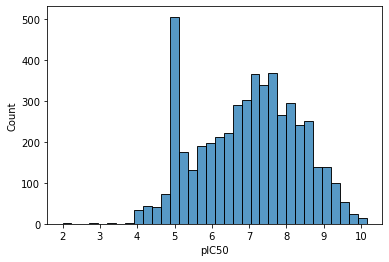

In [37]:
sns.histplot(x='pIC50',data=model2_df)

In [38]:
model2_df

index molecule_chembl_id     class  \
0         0       CHEMBL269775  inactive   
1         1         CHEMBL6683  inactive   
2         2         CHEMBL7237  inactive   
3         3       CHEMBL269732    active   
4         4       CHEMBL266660  inactive   
...     ...                ...       ...   
5020   5107      CHEMBL5218622    active   
5021   5108      CHEMBL5218468    active   
5022   5109      CHEMBL5218453    active   
5023   5110      CHEMBL5218596    active   
5024   5111      CHEMBL5220740    active   

                                   canonical_smiles_new       MW    LogP  \
0     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C  352.475  2.0102   
1     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1  372.465  2.2779   
2          CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1  346.427  2.1636   
3     C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...  804.031  4.6390   
4     CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1...  395.477  1.6097   
...                                                 ...      ...     ...   
5020  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)cc(N4CCOC[C@@H...  434.540  3.7556   
5021  C[C@H]1COCCN1c1cc(N2CCOC[C@@H]2C)c2ccc(-c3ccc(...  477.609  2.8289   
5022  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  464.566  3.2479   
5023  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  434.540  3.7556   
5024  C[C@H]1COCCN1c1cc2nc(-c3cccc(CO)c3)ccc2c(N2CCO...  434.540  3.2393   

      NumHDonors  NumHAcceptors     pIC50  
0            0.0            5.0  5.000000  
1            0.0            5.0  5.000000  
2            0.0            5.0  5.000000  
3            3.0           12.0  8.500038  
4            0.0            6.0  5.000000  
...          ...            ...       ...  
5020         0.0            7.0  7.000000  
5021         2.0            8.0  7.000000  
5022         1.0            8.0  7.000000  
5023         0.0            7.0  7.000000  
5024         1.0            7.0  7.000000  

[5025 rows x 9 columns]

### Dropping Duplicates

In [39]:
model2_df = model2_df.drop_duplicates(['canonical_smiles_new'])
model2_df   

index molecule_chembl_id     class  \
0         0       CHEMBL269775  inactive   
1         1         CHEMBL6683  inactive   
2         2         CHEMBL7237  inactive   
3         3       CHEMBL269732    active   
4         4       CHEMBL266660  inactive   
...     ...                ...       ...   
5020   5107      CHEMBL5218622    active   
5021   5108      CHEMBL5218468    active   
5022   5109      CHEMBL5218453    active   
5023   5110      CHEMBL5218596    active   
5024   5111      CHEMBL5220740    active   

                                   canonical_smiles_new       MW    LogP  \
0     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C  352.475  2.0102   
1     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1  372.465  2.2779   
2          CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1  346.427  2.1636   
3     C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...  804.031  4.6390   
4     CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1...  395.477  1.6097   
...                                                 ...      ...     ...   
5020  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)cc(N4CCOC[C@@H...  434.540  3.7556   
5021  C[C@H]1COCCN1c1cc(N2CCOC[C@@H]2C)c2ccc(-c3ccc(...  477.609  2.8289   
5022  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  464.566  3.2479   
5023  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  434.540  3.7556   
5024  C[C@H]1COCCN1c1cc2nc(-c3cccc(CO)c3)ccc2c(N2CCO...  434.540  3.2393   

      NumHDonors  NumHAcceptors     pIC50  
0            0.0            5.0  5.000000  
1            0.0            5.0  5.000000  
2            0.0            5.0  5.000000  
3            3.0           12.0  8.500038  
4            0.0            6.0  5.000000  
...          ...            ...       ...  
5020         0.0            7.0  7.000000  
5021         2.0            8.0  7.000000  
5022         1.0            8.0  7.000000  
5023         0.0            7.0  7.000000  
5024         1.0            7.0  7.000000  

[4528 rows x 9 columns]

In [40]:
analysis_df = model2_df[model2_df['class'] != 'intermediate']
analysis_df

index molecule_chembl_id     class  \
0         0       CHEMBL269775  inactive   
1         1         CHEMBL6683  inactive   
2         2         CHEMBL7237  inactive   
3         3       CHEMBL269732    active   
4         4       CHEMBL266660  inactive   
...     ...                ...       ...   
5020   5107      CHEMBL5218622    active   
5021   5108      CHEMBL5218468    active   
5022   5109      CHEMBL5218453    active   
5023   5110      CHEMBL5218596    active   
5024   5111      CHEMBL5220740    active   

                                   canonical_smiles_new       MW    LogP  \
0     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C  352.475  2.0102   
1     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1  372.465  2.2779   
2          CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1  346.427  2.1636   
3     C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...  804.031  4.6390   
4     CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1...  395.477  1.6097   
...                                                 ...      ...     ...   
5020  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)cc(N4CCOC[C@@H...  434.540  3.7556   
5021  C[C@H]1COCCN1c1cc(N2CCOC[C@@H]2C)c2ccc(-c3ccc(...  477.609  2.8289   
5022  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  464.566  3.2479   
5023  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  434.540  3.7556   
5024  C[C@H]1COCCN1c1cc2nc(-c3cccc(CO)c3)ccc2c(N2CCO...  434.540  3.2393   

      NumHDonors  NumHAcceptors     pIC50  
0            0.0            5.0  5.000000  
1            0.0            5.0  5.000000  
2            0.0            5.0  5.000000  
3            3.0           12.0  8.500038  
4            0.0            6.0  5.000000  
...          ...            ...       ...  
5020         0.0            7.0  7.000000  
5021         2.0            8.0  7.000000  
5022         1.0            8.0  7.000000  
5023         0.0            7.0  7.000000  
5024         1.0            7.0  7.000000  

[3963 rows x 9 columns]

### EDA

In [41]:
analysis_df

index molecule_chembl_id     class  \
0         0       CHEMBL269775  inactive   
1         1         CHEMBL6683  inactive   
2         2         CHEMBL7237  inactive   
3         3       CHEMBL269732    active   
4         4       CHEMBL266660  inactive   
...     ...                ...       ...   
5020   5107      CHEMBL5218622    active   
5021   5108      CHEMBL5218468    active   
5022   5109      CHEMBL5218453    active   
5023   5110      CHEMBL5218596    active   
5024   5111      CHEMBL5220740    active   

                                   canonical_smiles_new       MW    LogP  \
0     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C  352.475  2.0102   
1     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1  372.465  2.2779   
2          CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1  346.427  2.1636   
3     C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...  804.031  4.6390   
4     CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1...  395.477  1.6097   
...                                                 ...      ...     ...   
5020  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)cc(N4CCOC[C@@H...  434.540  3.7556   
5021  C[C@H]1COCCN1c1cc(N2CCOC[C@@H]2C)c2ccc(-c3ccc(...  477.609  2.8289   
5022  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  464.566  3.2479   
5023  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  434.540  3.7556   
5024  C[C@H]1COCCN1c1cc2nc(-c3cccc(CO)c3)ccc2c(N2CCO...  434.540  3.2393   

      NumHDonors  NumHAcceptors     pIC50  
0            0.0            5.0  5.000000  
1            0.0            5.0  5.000000  
2            0.0            5.0  5.000000  
3            3.0           12.0  8.500038  
4            0.0            6.0  5.000000  
...          ...            ...       ...  
5020         0.0            7.0  7.000000  
5021         2.0            8.0  7.000000  
5022         1.0            8.0  7.000000  
5023         0.0            7.0  7.000000  
5024         1.0            7.0  7.000000  

[3963 rows x 9 columns]

<AxesSubplot:xlabel='class', ylabel='count'>

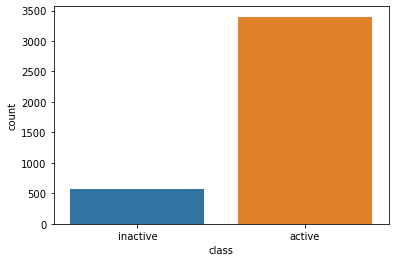

In [42]:
sns.countplot(x='class',data=analysis_df)

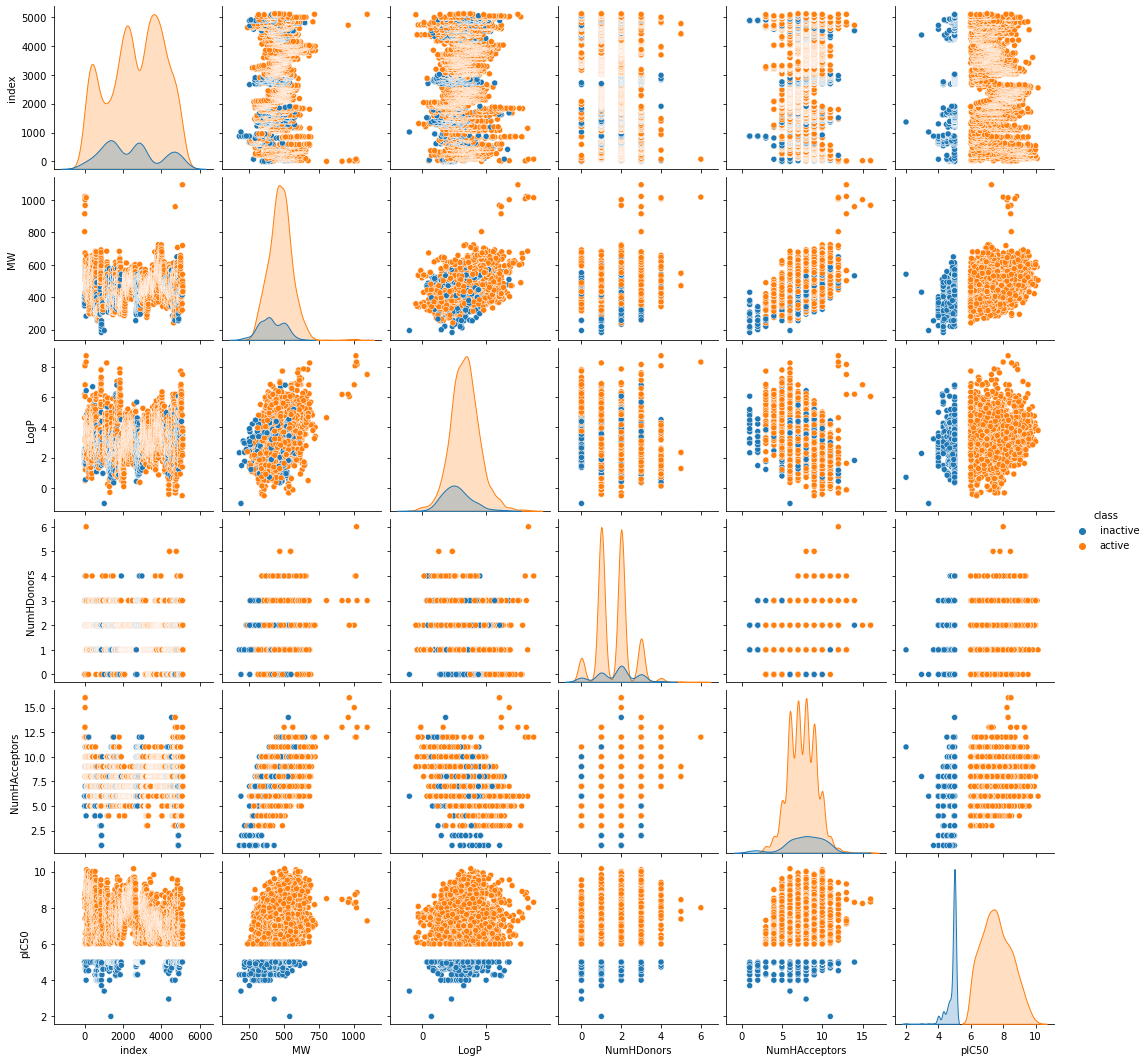

In [43]:
sns.pairplot(data=analysis_df,hue='class')

In [44]:
for cols in analysis_df.iloc[:,-5:]:
    res = stats.anderson(analysis_df[cols])
    if res.statistic > max(res.critical_values):
        print('signifiant, reject null, not normal')
    else:
        print('not signifiant, accept null, normal')

signifiant, reject null, not normal
signifiant, reject null, not normal
signifiant, reject null, not normal
signifiant, reject null, not normal
signifiant, reject null, not normal


In [45]:
group1 = analysis_df[analysis_df['class'] == 'active']
group2 = analysis_df[analysis_df['class'] == 'inactive']

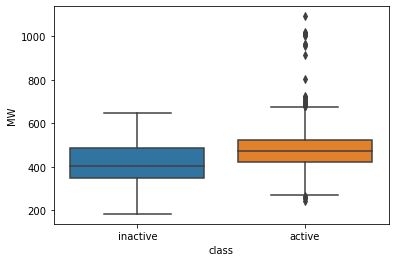

signifiant, reject null, different distribution


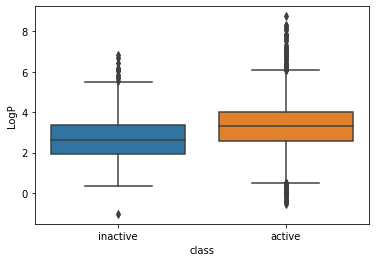

signifiant, reject null, different distribution


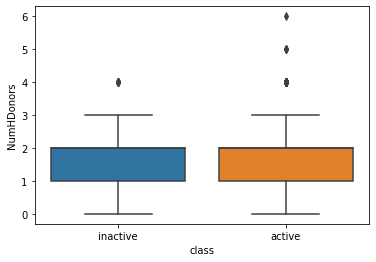

signifiant, reject null, different distribution


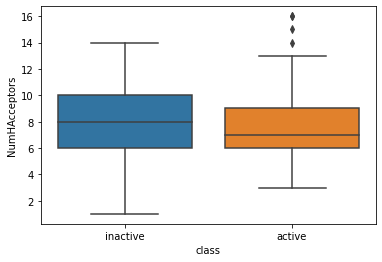

signifiant, reject null, different distribution


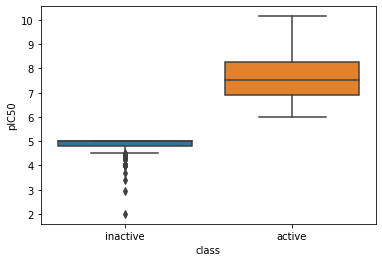

signifiant, reject null, different distribution


In [46]:
for cols in analysis_df.iloc[:,-5:]:
    sns.boxplot(x='class',y=cols,data=analysis_df)
    plt.show()
    res = stats.mannwhitneyu(group1[cols], group2[cols], alternative='two-sided')
    if res.pvalue < 0.05:
        print('signifiant, reject null, different distribution')
    else:
        print('not signifiant, accept null, same distribution')

### PaDel Descriptors

In [47]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-08-31 11:45:15--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-08-31 11:45:15--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: 'padel.zip'

padel.zip           100%[===================>]  24.57M  15.8MB/s    in 1.6s    

2023-08-31 11:45:17 (15.8 MB/s) - 'padel.zip' saved [25768637/25768637]

--2023-08-31 11:45:17--  https://githu

In [48]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

  inflating: PaDEL-Descriptor/lib/cdk-1.4.15.jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._cdk-1.4.15.jar  
  inflating: PaDEL-Descriptor/lib/ambit2-smarts-2.4.7-SNAPSHOT(5).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._ambit2-smarts-2.4.7-SNAPSHOT(5).jar  
  inflating: PaDEL-Descriptor/lib/ambit2-core-2.4.7-SNAPSHOT(1).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._ambit2-core-2.4.7-SNAPSHOT(1).jar  
  inflating: PaDEL-Descriptor/lib/libPaDEL-Jobs(8).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._libPaDEL-Jobs(8).jar  
  inflating: PaDEL-Descriptor/lib/jgrapht-0.6.0(6).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._jgrapht-0.6.0(6).jar  
  inflating: PaDEL-Descriptor/lib/jama(2).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._jama(2).jar  
  inflating: PaDEL-Descriptor/lib/jama(3).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._jama(3).jar  
  inflating: PaDEL-Descriptor/lib/commons-cli-1.2(1).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._commons-cli-1

In [49]:
selection = ['canonical_smiles_new','molecule_chembl_id']
model3_df = model2_df[selection]
model3_df.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [50]:
! cat molecule.smi | head -5

CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C	CHEMBL269775
CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1	CHEMBL6683
CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1	CHEMBL7237
C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[C@@](O)(C(=O)C(=O)N3CCCC[C@H]3C(=O)O[C@H](/C(C)=C/[C@@H]3CC[C@@H](O)[C@H](OC)C3)[C@H](C)[C@@H](O)CC1=O)[C@H](C)C[C@@H]2OC	CHEMBL269732
CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1ccccc1	CHEMBL266660
cat: stdout: Broken pipe


In [51]:
! cat molecule.smi | wc -l

    4528


In [52]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [53]:
! bash padel.sh

Processing CHEMBL269775 in molecule.smi (1/4528). 
Processing CHEMBL6683 in molecule.smi (2/4528). 
Processing CHEMBL7237 in molecule.smi (3/4528). 
Processing CHEMBL269732 in molecule.smi (4/4528). 
Processing CHEMBL266660 in molecule.smi (5/4528). 
Processing CHEMBL269154 in molecule.smi (6/4528). 
Processing CHEMBL266941 in molecule.smi (7/4528). 
Processing CHEMBL413 in molecule.smi (8/4528). 
Processing CHEMBL6449 in molecule.smi (10/4528). Average speed: 3.13 s/mol.
Processing CHEMBL435507 in molecule.smi (13/4528). Average speed: 1.57 s/mol.
Processing CHEMBL6833 in molecule.smi (9/4528). Average speed: 3.13 s/mol.
Processing CHEMBL104468 in molecule.smi (15/4528). Average speed: 0.93 s/mol.
Processing CHEMBL6809 in molecule.smi (11/4528). Average speed: 2.09 s/mol.
Processing CHEMBL98350 in molecule.smi (14/4528). Average speed: 1.26 s/mol.
Processing CHEMBL6367 in molecule.smi (12/4528). Average speed: 1.57 s/mol.
Processing CHEMBL179242 in molecule.smi (16/4528). Average spee

Processing CHEMBL575935 in molecule.smi (109/4528). Average speed: 0.14 s/mol.
Processing CHEMBL574405 in molecule.smi (110/4528). Average speed: 0.14 s/mol.
Processing CHEMBL574211 in molecule.smi (111/4528). Average speed: 0.14 s/mol.
Processing CHEMBL575929 in molecule.smi (112/4528). Average speed: 0.14 s/mol.
Processing CHEMBL578661 in molecule.smi (113/4528). Average speed: 0.14 s/mol.
Processing CHEMBL586051 in molecule.smi (114/4528). Average speed: 0.14 s/mol.
Processing CHEMBL578453 in molecule.smi (115/4528). Average speed: 0.14 s/mol.
Processing CHEMBL572830 in molecule.smi (116/4528). Average speed: 0.14 s/mol.
Processing CHEMBL574641 in molecule.smi (117/4528). Average speed: 0.14 s/mol.
Processing CHEMBL582922 in molecule.smi (118/4528). Average speed: 0.13 s/mol.
Processing CHEMBL576543 in molecule.smi (119/4528). Average speed: 0.13 s/mol.
Processing CHEMBL573178 in molecule.smi (120/4528). Average speed: 0.13 s/mol.
Processing CHEMBL583194 in molecule.smi (121/4528). 

Processing CHEMBL591576 in molecule.smi (215/4528). Average speed: 0.09 s/mol.
Processing CHEMBL602184 in molecule.smi (216/4528). Average speed: 0.09 s/mol.
Processing CHEMBL590386 in molecule.smi (217/4528). Average speed: 0.09 s/mol.
Processing CHEMBL590619 in molecule.smi (218/4528). Average speed: 0.09 s/mol.
Processing CHEMBL590620 in molecule.smi (219/4528). Average speed: 0.09 s/mol.
Processing CHEMBL604247 in molecule.smi (220/4528). Average speed: 0.09 s/mol.
Processing CHEMBL592522 in molecule.smi (221/4528). Average speed: 0.09 s/mol.
Processing CHEMBL510164 in molecule.smi (222/4528). Average speed: 0.09 s/mol.
Processing CHEMBL594844 in molecule.smi (223/4528). Average speed: 0.09 s/mol.
Processing CHEMBL593156 in molecule.smi (224/4528). Average speed: 0.09 s/mol.
Processing CHEMBL603212 in molecule.smi (225/4528). Average speed: 0.09 s/mol.
Processing CHEMBL595288 in molecule.smi (226/4528). Average speed: 0.09 s/mol.
Processing CHEMBL595743 in molecule.smi (227/4528). 

Processing CHEMBL589600 in molecule.smi (321/4528). Average speed: 0.08 s/mol.
Processing CHEMBL590084 in molecule.smi (322/4528). Average speed: 0.08 s/mol.
Processing CHEMBL601073 in molecule.smi (323/4528). Average speed: 0.08 s/mol.
Processing CHEMBL590577 in molecule.smi (324/4528). Average speed: 0.08 s/mol.
Processing CHEMBL590578 in molecule.smi (325/4528). Average speed: 0.08 s/mol.
Processing CHEMBL600258 in molecule.smi (326/4528). Average speed: 0.08 s/mol.
Processing CHEMBL591759 in molecule.smi (327/4528). Average speed: 0.08 s/mol.
Processing CHEMBL591760 in molecule.smi (328/4528). Average speed: 0.08 s/mol.
Processing CHEMBL592063 in molecule.smi (329/4528). Average speed: 0.08 s/mol.
Processing CHEMBL591761 in molecule.smi (330/4528). Average speed: 0.08 s/mol.
Processing CHEMBL591357 in molecule.smi (331/4528). Average speed: 0.08 s/mol.
Processing CHEMBL591358 in molecule.smi (332/4528). Average speed: 0.08 s/mol.
Processing CHEMBL589412 in molecule.smi (333/4528). 

Processing CHEMBL1092781 in molecule.smi (424/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1093754 in molecule.smi (425/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1088745 in molecule.smi (426/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1088746 in molecule.smi (427/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1092818 in molecule.smi (428/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1094015 in molecule.smi (429/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1094016 in molecule.smi (430/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1092474 in molecule.smi (431/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1092768 in molecule.smi (432/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1090381 in molecule.smi (433/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1090382 in molecule.smi (434/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1090383 in molecule.smi (435/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1094017 in molecule.smi

Processing CHEMBL1098301 in molecule.smi (529/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1095945 in molecule.smi (530/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1098619 in molecule.smi (531/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1098300 in molecule.smi (532/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1097897 in molecule.smi (533/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1095946 in molecule.smi (534/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1097261 in molecule.smi (535/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1097263 in molecule.smi (537/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1097898 in molecule.smi (536/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1097561 in molecule.smi (539/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1097603 in molecule.smi (538/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1097262 in molecule.smi (540/4528). Average speed: 0.07 s/mol.
Processing CHEMBL1098310 in molecule.smi

Processing CHEMBL1241773 in molecule.smi (634/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1241860 in molecule.smi (635/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1241861 in molecule.smi (636/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1241862 in molecule.smi (637/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1241946 in molecule.smi (638/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1241439 in molecule.smi (639/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1241947 in molecule.smi (640/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1241948 in molecule.smi (641/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1242030 in molecule.smi (642/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1242031 in molecule.smi (643/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1242032 in molecule.smi (644/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1242115 in molecule.smi (645/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1241676 in molecule.smi

Processing CHEMBL1255814 in molecule.smi (737/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1255815 in molecule.smi (738/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1258516 in molecule.smi (739/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1258517 in molecule.smi (740/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1258634 in molecule.smi (741/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1255816 in molecule.smi (742/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1258635 in molecule.smi (743/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1258743 in molecule.smi (744/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1258744 in molecule.smi (745/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1258995 in molecule.smi (746/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1256447 in molecule.smi (747/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1256448 in molecule.smi (748/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1256449 in molecule.smi

Processing CHEMBL1774942 in molecule.smi (840/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1774941 in molecule.smi (841/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1774940 in molecule.smi (842/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1615188 in molecule.smi (843/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1773583 in molecule.smi (844/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1773584 in molecule.smi (845/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1773585 in molecule.smi (846/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1773586 in molecule.smi (847/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1773587 in molecule.smi (848/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1773588 in molecule.smi (849/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1773589 in molecule.smi (850/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1773590 in molecule.smi (851/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1773591 in molecule.smi

Processing CHEMBL1808986 in molecule.smi (944/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1808987 in molecule.smi (945/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1808988 in molecule.smi (946/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1808989 in molecule.smi (947/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1808990 in molecule.smi (948/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1808991 in molecule.smi (949/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1808993 in molecule.smi (951/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1808992 in molecule.smi (950/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1822052 in molecule.smi (952/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1822053 in molecule.smi (953/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1822054 in molecule.smi (954/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1822055 in molecule.smi (955/4528). Average speed: 0.06 s/mol.
Processing CHEMBL1822057 in molecule.smi

Processing CHEMBL2030446 in molecule.smi (1048/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2029359 in molecule.smi (1049/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2030445 in molecule.smi (1050/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2030444 in molecule.smi (1051/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2030443 in molecule.smi (1052/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2030442 in molecule.smi (1053/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2030441 in molecule.smi (1054/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2030436 in molecule.smi (1055/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2030437 in molecule.smi (1056/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2030438 in molecule.smi (1057/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2030439 in molecule.smi (1058/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2030440 in molecule.smi (1059/4528). Average speed: 0.05 s/mol.
Processing CHEMBL1312643 in 

Processing CHEMBL2158865 in molecule.smi (1150/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2158864 in molecule.smi (1151/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2165007 in molecule.smi (1152/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2165006 in molecule.smi (1153/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2165005 in molecule.smi (1154/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2165004 in molecule.smi (1155/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2165003 in molecule.smi (1156/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2165020 in molecule.smi (1157/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2165019 in molecule.smi (1158/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2165018 in molecule.smi (1159/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2165017 in molecule.smi (1160/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2165016 in molecule.smi (1161/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2165014 in 

Processing CHEMBL2170099 in molecule.smi (1252/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2170098 in molecule.smi (1253/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2170097 in molecule.smi (1254/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2170096 in molecule.smi (1255/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2170095 in molecule.smi (1256/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2170094 in molecule.smi (1257/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2170093 in molecule.smi (1258/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2170092 in molecule.smi (1259/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2170091 in molecule.smi (1260/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2206906 in molecule.smi (1261/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2206904 in molecule.smi (1262/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2206921 in molecule.smi (1263/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2206913 in 

Processing CHEMBL573339 in molecule.smi (1355/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3360085 in molecule.smi (1356/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3354566 in molecule.smi (1357/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3218581 in molecule.smi (1358/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3355072 in molecule.smi (1359/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3355073 in molecule.smi (1360/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3355074 in molecule.smi (1361/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3355474 in molecule.smi (1362/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3355475 in molecule.smi (1363/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3355480 in molecule.smi (1364/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3358288 in molecule.smi (1365/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3358287 in molecule.smi (1366/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3358286 in m

Processing CHEMBL3586400 in molecule.smi (1457/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3586399 in molecule.smi (1458/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3586398 in molecule.smi (1459/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3586397 in molecule.smi (1460/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3586396 in molecule.smi (1461/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3586405 in molecule.smi (1462/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3586395 in molecule.smi (1463/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3586394 in molecule.smi (1464/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3590219 in molecule.smi (1465/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3590222 in molecule.smi (1466/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3594042 in molecule.smi (1467/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3601923 in molecule.smi (1468/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3601925 in 

Processing CHEMBL3545097 in molecule.smi (1559/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3893037 in molecule.smi (1560/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3965413 in molecule.smi (1561/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3925171 in molecule.smi (1562/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3914396 in molecule.smi (1563/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3961477 in molecule.smi (1564/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3360203 in molecule.smi (1565/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670140 in molecule.smi (1566/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670141 in molecule.smi (1567/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670142 in molecule.smi (1568/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670143 in molecule.smi (1569/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670144 in molecule.smi (1570/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670145 in 

Processing CHEMBL3670234 in molecule.smi (1661/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670235 in molecule.smi (1662/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670236 in molecule.smi (1663/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670237 in molecule.smi (1664/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670238 in molecule.smi (1665/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670239 in molecule.smi (1666/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670240 in molecule.smi (1667/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670241 in molecule.smi (1668/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670242 in molecule.smi (1669/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670243 in molecule.smi (1670/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670244 in molecule.smi (1671/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670245 in molecule.smi (1672/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3670246 in 

Processing CHEMBL3640976 in molecule.smi (1763/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3640977 in molecule.smi (1764/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3640978 in molecule.smi (1765/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3640979 in molecule.smi (1766/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3640980 in molecule.smi (1767/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3640981 in molecule.smi (1768/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3640983 in molecule.smi (1770/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3640982 in molecule.smi (1769/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3640984 in molecule.smi (1771/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3640985 in molecule.smi (1772/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3640986 in molecule.smi (1773/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3640987 in molecule.smi (1774/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3640988 in 

Processing CHEMBL3643113 in molecule.smi (1866/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643114 in molecule.smi (1867/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643115 in molecule.smi (1868/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643116 in molecule.smi (1869/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643117 in molecule.smi (1870/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643118 in molecule.smi (1871/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643119 in molecule.smi (1872/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643120 in molecule.smi (1873/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643121 in molecule.smi (1874/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643122 in molecule.smi (1875/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643123 in molecule.smi (1876/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643124 in molecule.smi (1877/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643125 in 

Processing CHEMBL3643213 in molecule.smi (1968/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643214 in molecule.smi (1969/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643215 in molecule.smi (1970/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643217 in molecule.smi (1972/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643216 in molecule.smi (1971/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643218 in molecule.smi (1973/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643219 in molecule.smi (1974/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643220 in molecule.smi (1975/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643221 in molecule.smi (1976/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643222 in molecule.smi (1977/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643223 in molecule.smi (1978/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643224 in molecule.smi (1979/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643225 in 

Processing CHEMBL3645802 in molecule.smi (2070/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645803 in molecule.smi (2071/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645804 in molecule.smi (2072/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645805 in molecule.smi (2073/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645806 in molecule.smi (2074/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645807 in molecule.smi (2075/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645808 in molecule.smi (2076/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645809 in molecule.smi (2077/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645810 in molecule.smi (2078/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645811 in molecule.smi (2079/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645812 in molecule.smi (2080/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645813 in molecule.smi (2081/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645814 in 

Processing CHEMBL3645903 in molecule.smi (2172/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645904 in molecule.smi (2173/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645905 in molecule.smi (2174/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645906 in molecule.smi (2175/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645907 in molecule.smi (2176/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645908 in molecule.smi (2177/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645909 in molecule.smi (2178/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645910 in molecule.smi (2179/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645911 in molecule.smi (2180/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645912 in molecule.smi (2181/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645913 in molecule.smi (2182/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645914 in molecule.smi (2183/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3645915 in 

Processing CHEMBL3648878 in molecule.smi (2274/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3648879 in molecule.smi (2275/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3648880 in molecule.smi (2276/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3648881 in molecule.smi (2277/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3648882 in molecule.smi (2278/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3648883 in molecule.smi (2279/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3648886 in molecule.smi (2282/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3648884 in molecule.smi (2280/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3648885 in molecule.smi (2281/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3648887 in molecule.smi (2283/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3648888 in molecule.smi (2284/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3648889 in molecule.smi (2285/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3649441 in 

Processing CHEMBL3646466 in molecule.smi (2376/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646467 in molecule.smi (2377/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646468 in molecule.smi (2378/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646469 in molecule.smi (2379/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646470 in molecule.smi (2380/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646471 in molecule.smi (2381/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646472 in molecule.smi (2382/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3649477 in molecule.smi (2383/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646473 in molecule.smi (2384/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646474 in molecule.smi (2385/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646475 in molecule.smi (2386/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646476 in molecule.smi (2387/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646477 in 

Processing CHEMBL3646564 in molecule.smi (2478/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2206912 in molecule.smi (2479/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2206911 in molecule.smi (2480/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646565 in molecule.smi (2481/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646566 in molecule.smi (2482/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646567 in molecule.smi (2483/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646568 in molecule.smi (2484/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646569 in molecule.smi (2485/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3649480 in molecule.smi (2486/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646570 in molecule.smi (2487/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646571 in molecule.smi (2488/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646572 in molecule.smi (2489/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3646573 in 

Processing CHEMBL3650230 in molecule.smi (2580/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3650231 in molecule.smi (2581/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3650232 in molecule.smi (2582/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3650233 in molecule.smi (2583/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3650234 in molecule.smi (2584/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3650235 in molecule.smi (2585/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3650236 in molecule.smi (2586/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3650237 in molecule.smi (2587/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3650238 in molecule.smi (2588/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3650239 in molecule.smi (2589/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653527 in molecule.smi (2590/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653528 in molecule.smi (2591/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653529 in 

Processing CHEMBL3653620 in molecule.smi (2684/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653621 in molecule.smi (2685/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653622 in molecule.smi (2686/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653623 in molecule.smi (2687/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653625 in molecule.smi (2689/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653624 in molecule.smi (2688/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653627 in molecule.smi (2691/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653626 in molecule.smi (2690/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653630 in molecule.smi (2694/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653628 in molecule.smi (2692/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653629 in molecule.smi (2693/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653631 in molecule.smi (2695/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3653633 in 

Processing CHEMBL3701092 in molecule.smi (2787/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3701093 in molecule.smi (2788/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3701094 in molecule.smi (2789/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3701095 in molecule.smi (2790/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3701096 in molecule.smi (2791/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3701097 in molecule.smi (2792/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3701098 in molecule.smi (2793/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3701099 in molecule.smi (2794/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3701100 in molecule.smi (2795/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3701101 in molecule.smi (2796/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3701102 in molecule.smi (2797/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3701103 in molecule.smi (2798/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3701104 in 

Processing CHEMBL3688843 in molecule.smi (2889/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688844 in molecule.smi (2890/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688845 in molecule.smi (2891/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688846 in molecule.smi (2892/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688847 in molecule.smi (2893/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688850 in molecule.smi (2894/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688849 in molecule.smi (2896/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688848 in molecule.smi (2895/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688851 in molecule.smi (2897/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688852 in molecule.smi (2898/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688853 in molecule.smi (2899/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688854 in molecule.smi (2900/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688855 in 

Processing CHEMBL3688942 in molecule.smi (2992/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688943 in molecule.smi (2993/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688944 in molecule.smi (2994/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688945 in molecule.smi (2995/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688946 in molecule.smi (2996/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688947 in molecule.smi (2997/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688948 in molecule.smi (2998/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688949 in molecule.smi (2999/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688950 in molecule.smi (3000/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688951 in molecule.smi (3001/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688952 in molecule.smi (3002/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688953 in molecule.smi (3003/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688954 in 

Processing CHEMBL3693388 in molecule.smi (3094/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693389 in molecule.smi (3095/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693390 in molecule.smi (3096/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693391 in molecule.smi (3097/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693392 in molecule.smi (3098/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693393 in molecule.smi (3099/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693394 in molecule.smi (3100/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693395 in molecule.smi (3101/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693396 in molecule.smi (3102/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693397 in molecule.smi (3103/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693398 in molecule.smi (3104/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693399 in molecule.smi (3105/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693400 in 

Processing CHEMBL3693487 in molecule.smi (3196/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693488 in molecule.smi (3197/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693489 in molecule.smi (3198/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693490 in molecule.smi (3199/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693491 in molecule.smi (3200/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693492 in molecule.smi (3201/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693493 in molecule.smi (3202/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693494 in molecule.smi (3203/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693495 in molecule.smi (3204/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693496 in molecule.smi (3205/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693497 in molecule.smi (3206/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2336334 in molecule.smi (3207/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2336318 in 

Processing CHEMBL3693586 in molecule.smi (3298/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693587 in molecule.smi (3299/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3693588 in molecule.smi (3300/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2335862 in molecule.smi (3301/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688830 in molecule.smi (3302/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3688831 in molecule.smi (3303/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3978752 in molecule.smi (3304/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3895113 in molecule.smi (3307/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3908330 in molecule.smi (3305/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3960573 in molecule.smi (3306/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3924639 in molecule.smi (3308/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3915652 in molecule.smi (3310/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3893108 in 

Processing CHEMBL3927688 in molecule.smi (3400/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3899666 in molecule.smi (3401/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3890695 in molecule.smi (3402/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3913268 in molecule.smi (3403/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3983105 in molecule.smi (3404/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3944386 in molecule.smi (3405/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3919993 in molecule.smi (3406/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3897742 in molecule.smi (3407/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3922289 in molecule.smi (3408/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3983141 in molecule.smi (3409/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3906651 in molecule.smi (3410/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3975159 in molecule.smi (3411/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3902096 in 

Processing CHEMBL3982586 in molecule.smi (3502/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3966167 in molecule.smi (3503/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3894827 in molecule.smi (3504/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3899745 in molecule.smi (3505/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3970894 in molecule.smi (3506/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3979520 in molecule.smi (3507/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3912425 in molecule.smi (3508/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3961744 in molecule.smi (3509/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3954545 in molecule.smi (3510/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3918592 in molecule.smi (3511/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3959841 in molecule.smi (3512/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3965674 in molecule.smi (3513/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3933002 in 

Processing CHEMBL3949307 in molecule.smi (3605/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3921512 in molecule.smi (3606/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3984561 in molecule.smi (3607/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3926940 in molecule.smi (3608/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3927986 in molecule.smi (3609/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3900001 in molecule.smi (3610/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3977516 in molecule.smi (3612/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3948281 in molecule.smi (3611/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3960400 in molecule.smi (3613/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3985605 in molecule.smi (3614/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3933978 in molecule.smi (3615/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3961469 in molecule.smi (3616/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3939504 in 

Processing CHEMBL4115534 in molecule.smi (3708/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4115205 in molecule.smi (3709/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4107741 in molecule.smi (3710/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4112797 in molecule.smi (3711/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3946647 in molecule.smi (3712/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3934178 in molecule.smi (3713/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3901534 in molecule.smi (3714/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4107880 in molecule.smi (3715/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4114027 in molecule.smi (3716/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4108459 in molecule.smi (3718/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4109093 in molecule.smi (3717/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4109286 in molecule.smi (3719/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4112338 in 

Processing CHEMBL3967825 in molecule.smi (3810/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3915261 in molecule.smi (3812/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3946658 in molecule.smi (3811/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3937842 in molecule.smi (3813/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3914044 in molecule.smi (3814/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3968419 in molecule.smi (3815/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3970131 in molecule.smi (3817/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3935310 in molecule.smi (3816/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3944878 in molecule.smi (3818/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3913428 in molecule.smi (3819/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3921669 in molecule.smi (3820/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3946028 in molecule.smi (3821/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3909202 in 

Processing CHEMBL4100862 in molecule.smi (3912/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4081904 in molecule.smi (3913/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4092165 in molecule.smi (3914/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4071370 in molecule.smi (3915/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4098203 in molecule.smi (3916/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4071150 in molecule.smi (3917/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4079258 in molecule.smi (3918/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4097282 in molecule.smi (3919/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4068426 in molecule.smi (3920/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4089567 in molecule.smi (3921/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4102855 in molecule.smi (3922/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4084907 in molecule.smi (3923/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4065928 in 

Processing CHEMBL4090667 in molecule.smi (4015/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4095949 in molecule.smi (4016/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4068631 in molecule.smi (4017/4528). Average speed: 0.05 s/mol.
Processing CHEMBL2331680 in molecule.smi (4018/4528). Average speed: 0.05 s/mol.
Processing CHEMBL3643413 in molecule.smi (4019/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4166823 in molecule.smi (4020/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4173671 in molecule.smi (4021/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4173271 in molecule.smi (4022/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4165357 in molecule.smi (4023/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4169844 in molecule.smi (4024/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4162272 in molecule.smi (4025/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4170185 in molecule.smi (4026/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4166144 in 

Processing CHEMBL4572537 in molecule.smi (4117/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4466519 in molecule.smi (4118/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4460772 in molecule.smi (4121/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4475248 in molecule.smi (4120/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4540705 in molecule.smi (4119/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4462575 in molecule.smi (4122/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4571692 in molecule.smi (4123/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4451792 in molecule.smi (4124/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4454653 in molecule.smi (4125/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4529790 in molecule.smi (4126/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4564155 in molecule.smi (4127/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4473266 in molecule.smi (4128/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4571676 in 

Processing CHEMBL3775504 in molecule.smi (4219/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4785064 in molecule.smi (4220/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4749655 in molecule.smi (4221/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4787267 in molecule.smi (4222/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4799530 in molecule.smi (4223/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4744689 in molecule.smi (4224/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4756541 in molecule.smi (4225/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4760118 in molecule.smi (4226/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4756555 in molecule.smi (4227/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4755698 in molecule.smi (4228/4528). Average speed: 0.05 s/mol.
Processing CHEMBL1190965 in molecule.smi (4229/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4760858 in molecule.smi (4231/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4793551 in 

Processing CHEMBL4875080 in molecule.smi (4321/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4853785 in molecule.smi (4322/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4852833 in molecule.smi (4323/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4846573 in molecule.smi (4324/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4870555 in molecule.smi (4325/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4851886 in molecule.smi (4326/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4859305 in molecule.smi (4327/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4856810 in molecule.smi (4328/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4855326 in molecule.smi (4330/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4866093 in molecule.smi (4329/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4873255 in molecule.smi (4331/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4846136 in molecule.smi (4332/4528). Average speed: 0.05 s/mol.
Processing CHEMBL4860447 in 

Processing CHEMBL5079231 in molecule.smi (4425/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5089561 in molecule.smi (4424/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5071429 in molecule.smi (4426/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5084675 in molecule.smi (4427/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5079887 in molecule.smi (4428/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5091543 in molecule.smi (4429/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5076528 in molecule.smi (4430/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5093540 in molecule.smi (4431/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5070586 in molecule.smi (4432/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5085515 in molecule.smi (4433/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5083425 in molecule.smi (4434/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5086413 in molecule.smi (4435/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5080996 in 

Processing CHEMBL5218453 in molecule.smi (4526/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5218596 in molecule.smi (4527/4528). Average speed: 0.05 s/mol.
Processing CHEMBL5220740 in molecule.smi (4528/4528). Average speed: 0.05 s/mol.
Descriptor calculation completed in 3 mins 56.75 secs . Average speed: 0.05 s/mol.


In [54]:
model3_df = pd.read_csv('descriptors_output.csv')

In [55]:
model3_df

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0        CHEMBL7237           1           1           1           0   
1      CHEMBL269775           1           1           1           1   
2      CHEMBL266660           1           1           1           0   
3      CHEMBL266941           1           1           1           0   
4        CHEMBL6683           1           1           1           0   
...             ...         ...         ...         ...         ...   
4523  CHEMBL5218468           1           1           1           1   
4524  CHEMBL5218453           1           1           1           1   
4525  CHEMBL5218596           1           1           1           0   
4526  CHEMBL5220740           1           1           1           0   
4527  CHEMBL5219124           1           1           1           1   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           0           0           0           1   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
4523           0           0           0           0           0           1   
4524           0           0           0           0           0           1   
4525           0           0           0           0           0           1   
4526           0           0           0           0           0           1   
4527           0           0           0           0           0           1   

      PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
0               1            1            1            0            1   
1               1            1            1            0            1   
2               1            1            1            0            1   
3               1            1            1            0            1   
4               1            1            1            0            1   
...           ...          ...          ...          ...          ...   
4523            1            1            1            0            1   
4524            1            1            1            0            1   
4525            1            1            1            0            1   
4526            1            1            1            0            1   
4527            1            1            1            1            1   

      PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
0               1            0            0            1            1   
1               1            0            0            1            1   
2               0            0            0            1            1   
3               0            0            0            1            1   
4               1            0            0            1            1   
...           ...          ...          ...          ...          ...   
4523            1            1            0            1            1   
4524            1            1            0            1            1   
4525            1            1            0            1            1   
4526            1            1            0            1            1   
4527            1            1            1            1            1   

      PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
0               1            0            0            0            0   
1               1            0            0            0            0   
2               1            0            0            0            0   
3               1            0            0            0            0   
4               1            0            0            0            0   
...      

In [56]:
model3_df.shape

(4528, 882)

In [57]:
model2_df

index molecule_chembl_id     class  \
0         0       CHEMBL269775  inactive   
1         1         CHEMBL6683  inactive   
2         2         CHEMBL7237  inactive   
3         3       CHEMBL269732    active   
4         4       CHEMBL266660  inactive   
...     ...                ...       ...   
5020   5107      CHEMBL5218622    active   
5021   5108      CHEMBL5218468    active   
5022   5109      CHEMBL5218453    active   
5023   5110      CHEMBL5218596    active   
5024   5111      CHEMBL5220740    active   

                                   canonical_smiles_new       MW    LogP  \
0     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C  352.475  2.0102   
1     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1  372.465  2.2779   
2          CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1  346.427  2.1636   
3     C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...  804.031  4.6390   
4     CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1...  395.477  1.6097   
...                                                 ...      ...     ...   
5020  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)cc(N4CCOC[C@@H...  434.540  3.7556   
5021  C[C@H]1COCCN1c1cc(N2CCOC[C@@H]2C)c2ccc(-c3ccc(...  477.609  2.8289   
5022  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  464.566  3.2479   
5023  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  434.540  3.7556   
5024  C[C@H]1COCCN1c1cc2nc(-c3cccc(CO)c3)ccc2c(N2CCO...  434.540  3.2393   

      NumHDonors  NumHAcceptors     pIC50  
0            0.0            5.0  5.000000  
1            0.0            5.0  5.000000  
2            0.0            5.0  5.000000  
3            3.0           12.0  8.500038  
4            0.0            6.0  5.000000  
...          ...            ...       ...  
5020         0.0            7.0  7.000000  
5021         2.0            8.0  7.000000  
5022         1.0            8.0  7.000000  
5023         0.0            7.0  7.000000  
5024         1.0            7.0  7.000000  

[4528 rows x 9 columns]

In [58]:
model2_df = model2_df.reset_index()

In [59]:
model2_df.iloc[:,-5:]

MW    LogP  NumHDonors  NumHAcceptors     pIC50
0     352.475  2.0102         0.0            5.0  5.000000
1     372.465  2.2779         0.0            5.0  5.000000
2     346.427  2.1636         0.0            5.0  5.000000
3     804.031  4.6390         3.0           12.0  8.500038
4     395.477  1.6097         0.0            6.0  5.000000
...       ...     ...         ...            ...       ...
4523  434.540  3.7556         0.0            7.0  7.000000
4524  477.609  2.8289         2.0            8.0  7.000000
4525  464.566  3.2479         1.0            8.0  7.000000
4526  434.540  3.7556         0.0            7.0  7.000000
4527  434.540  3.2393         1.0            7.0  7.000000

[4528 rows x 5 columns]

In [60]:
X = model3_df.merge(model2_df, left_index=True, right_index=True)

In [61]:
X

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0        CHEMBL7237           1           1           1           0   
1      CHEMBL269775           1           1           1           1   
2      CHEMBL266660           1           1           1           0   
3      CHEMBL266941           1           1           1           0   
4        CHEMBL6683           1           1           1           0   
...             ...         ...         ...         ...         ...   
4523  CHEMBL5218468           1           1           1           1   
4524  CHEMBL5218453           1           1           1           1   
4525  CHEMBL5218596           1           1           1           0   
4526  CHEMBL5220740           1           1           1           0   
4527  CHEMBL5219124           1           1           1           1   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           0           0           0           1   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
4523           0           0           0           0           0           1   
4524           0           0           0           0           0           1   
4525           0           0           0           0           0           1   
4526           0           0           0           0           0           1   
4527           0           0           0           0           0           1   

      PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
0               1            1            1            0            1   
1               1            1            1            0            1   
2               1            1            1            0            1   
3               1            1            1            0            1   
4               1            1            1            0            1   
...           ...          ...          ...          ...          ...   
4523            1            1            1            0            1   
4524            1            1            1            0            1   
4525            1            1            1            0            1   
4526            1            1            1            0            1   
4527            1            1            1            1            1   

      PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
0               1            0            0            1            1   
1               1            0            0            1            1   
2               0            0            0            1            1   
3               0            0            0            1            1   
4               1            0            0            1            1   
...           ...          ...          ...          ...          ...   
4523            1            1            0            1            1   
4524            1            1            0            1            1   
4525            1            1            0            1            1   
4526            1            1            0            1            1   
4527            1            1            1            1            1   

      PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
0               1            0            0            0            0   
1               1            0            0            0            0   
2               1            0            0            0            0   
3               1            0            0            0            0   
4               1            0            0            0            0   
...      

In [62]:
#X = pd.concat([model3_df,model2_df.iloc[:,-5:]], axis=1)

In [63]:
y = X['pIC50']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
X_test.to_csv('sample_data.csv',index=False)

In [66]:
X_test

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
1340  CHEMBL3113388           1           1           1           0   
3190  CHEMBL3693484           1           1           1           1   
3296  CHEMBL3693585           1           1           1           0   
2253  CHEMBL3645984           1           1           1           0   
2884  CHEMBL3688838           1           1           1           0   
...             ...         ...         ...         ...         ...   
2353  CHEMBL3646447           1           1           1           0   
2323  CHEMBL3643938           1           1           1           0   
2386  CHEMBL3646477           1           1           1           0   
3799  CHEMBL4114446           1           1           1           1   
3928  CHEMBL4059989           1           1           1           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
1340           0           0           0           0           0           1   
3190           0           0           0           0           0           1   
3296           0           0           0           0           0           1   
2253           0           0           0           0           0           1   
2884           0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
2353           0           0           0           0           0           1   
2323           0           0           0           0           0           1   
2386           0           0           0           0           0           1   
3799           0           0           0           0           0           1   
3928           0           0           0           0           0           1   

      PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
1340            1            1            1            0            1   
3190            1            1            1            0            1   
3296            1            1            1            0            1   
2253            1            1            1            0            1   
2884            1            1            1            0            1   
...           ...          ...          ...          ...          ...   
2353            1            1            1            0            1   
2323            1            1            1            0            1   
2386            1            1            1            0            1   
3799            1            1            1            0            1   
3928            1            1            1            0            1   

      PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
1340            1            0            0            1            1   
3190            1            1            0            1            1   
3296            1            1            0            1            1   
2253            1            1            0            1            1   
2884            1            1            0            1            1   
...           ...          ...          ...          ...          ...   
2353            1            1            1            1            1   
2323            1            1            0            1            0   
2386            1            1            1            1            0   
3799            1            1            0            1            1   
3928            1            1            0            1            1   

      PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
1340            0            0            0            0            0   
3190            1            0            0            0            0   
3296            1            0            0            0            0   
2253            0            0            0            0            0   
2884            1            0            0            0            0   
...      

In [67]:
X_train.to_csv('train_data.csv',index=False)

In [68]:
#X.to_csv('descriptors_output.csv',index=False)

In [69]:
X_train = X_train.drop(columns=['pIC50','level_0','index','class','canonical_smiles_new','molecule_chembl_id'])
X_test = X_test.drop(columns=['pIC50','level_0','index','class','canonical_smiles_new','molecule_chembl_id'])

In [70]:
X_train

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
3596  CHEMBL3954563           1           1           1           1   
1898  CHEMBL3643143           1           1           1           1   
2918  CHEMBL3688872           1           1           1           0   
413   CHEMBL1091698           1           1           1           1   
4472  CHEMBL5181030           1           1           0           0   
...             ...         ...         ...         ...         ...   
4497  CHEMBL5187418           1           1           1           0   
3522  CHEMBL3984825           1           1           1           1   
1977  CHEMBL3643222           1           1           1           0   
344    CHEMBL521851           1           1           1           0   
4157  CHEMBL4452675           1           1           1           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
3596           0           0           0           0           0           1   
1898           0           0           0           0           0           1   
2918           0           0           0           0           0           1   
413            0           0           0           0           0           1   
4472           0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
4497           0           0           0           0           0           1   
3522           0           0           0           0           0           1   
1977           0           0           0           0           0           1   
344            0           0           0           0           0           1   
4157           0           0           0           0           0           1   

      PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
3596            1            1            1            0            1   
1898            1            1            1            0            1   
2918            1            1            1            0            1   
413             1            1            1            1            1   
4472            1            1            1            0            1   
...           ...          ...          ...          ...          ...   
4497            1            1            1            0            1   
3522            1            1            1            1            1   
1977            1            1            1            0            1   
344             1            1            1            0            1   
4157            1            1            1            0            1   

      PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
3596            1            1            0            1            1   
1898            1            1            0            1            0   
2918            1            1            0            1            1   
413             1            1            1            1            1   
4472            1            1            0            0            0   
...           ...          ...          ...          ...          ...   
4497            1            1            0            1            1   
3522            1            1            0            1            1   
1977            1            1            0            1            1   
344             1            1            0            1            1   
4157            1            0            0            1            1   

      PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
3596            0            0            0            0            0   
1898            0            0            0            0            0   
2918            0            0            0            0            0   
413             1            0            0            0            0   
4472            0            0            0            1            1   
...      

In [71]:
#selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
#X = selection.fit_transform(X)

In [72]:
X_new = X.drop(columns=['pIC50','level_0','index','class','canonical_smiles_new','molecule_chembl_id'])

In [73]:
X_new

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0        CHEMBL7237           1           1           1           0   
1      CHEMBL269775           1           1           1           1   
2      CHEMBL266660           1           1           1           0   
3      CHEMBL266941           1           1           1           0   
4        CHEMBL6683           1           1           1           0   
...             ...         ...         ...         ...         ...   
4523  CHEMBL5218468           1           1           1           1   
4524  CHEMBL5218453           1           1           1           1   
4525  CHEMBL5218596           1           1           1           0   
4526  CHEMBL5220740           1           1           1           0   
4527  CHEMBL5219124           1           1           1           1   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           0           0           0           1   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
4523           0           0           0           0           0           1   
4524           0           0           0           0           0           1   
4525           0           0           0           0           0           1   
4526           0           0           0           0           0           1   
4527           0           0           0           0           0           1   

      PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
0               1            1            1            0            1   
1               1            1            1            0            1   
2               1            1            1            0            1   
3               1            1            1            0            1   
4               1            1            1            0            1   
...           ...          ...          ...          ...          ...   
4523            1            1            1            0            1   
4524            1            1            1            0            1   
4525            1            1            1            0            1   
4526            1            1            1            0            1   
4527            1            1            1            1            1   

      PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
0               1            0            0            1            1   
1               1            0            0            1            1   
2               0            0            0            1            1   
3               0            0            0            1            1   
4               1            0            0            1            1   
...           ...          ...          ...          ...          ...   
4523            1            1            0            1            1   
4524            1            1            0            1            1   
4525            1            1            0            1            1   
4526            1            1            0            1            1   
4527            1            1            1            1            1   

      PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
0               1            0            0            0            0   
1               1            0            0            0            0   
2               1            0            0            0            0   
3               1            0            0            0            0   
4               1            0            0            0            0   
...      

In [74]:
X_new.to_csv('descriptor_data.csv', index=False)

In [75]:
def low_var(inputdata, thresh=0.1):
    selection = VarianceThreshold(thresh)
    selection.fit(inputdata)
    return inputdata[inputdata.columns[selection.get_support(indices=True)]]

X_new = low_var(X_new.iloc[:,1:], thresh=0.1)

In [76]:
X_new

PubchemFP3  PubchemFP17  PubchemFP19  PubchemFP20  PubchemFP23  \
0              0            0            1            1            0   
1              1            0            1            1            0   
2              0            0            1            1            0   
3              0            0            1            1            0   
4              0            0            1            1            0   
...          ...          ...          ...          ...          ...   
4523           1            0            1            0            0   
4524           1            0            1            1            0   
4525           0            0            1            0            0   
4526           0            0            1            0            0   
4527           1            1            1            1            1   

      PubchemFP33  PubchemFP143  PubchemFP145  PubchemFP146  PubchemFP150  \
0               0             1             1             1             0   
1               0             1             1             1             0   
2               1             1             1             1             0   
3               1             1             1             1             0   
4               0             1             1             1             0   
...           ...           ...           ...           ...           ...   
4523            0             0             0             0             0   
4524            0             0             0             0             0   
4525            0             0             0             0             0   
4526            0             0             0             0             0   
4527            1             0             0             0             0   

      PubchemFP152  PubchemFP153  PubchemFP179  PubchemFP186  PubchemFP187  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             1             0             0   
3                0             0             1             0             0   
4                0             0             1             0             0   
...            ...           ...           ...           ...           ...   
4523             0             0             1             0             1   
4524             0             0             1             0             1   
4525             0             0             1             0             1   
4526             0             0             1             0             1   
4527             0             0             1             1             1   

      PubchemFP188  PubchemFP194  PubchemFP195  PubchemFP199  PubchemFP201  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4523             1             1             1             1             1   
4524             1             1             1             1             1   
4525             1             1             1             1             1   
4526             1             1             1             1             1   
4527             1             1             1             1             0   

      PubchemFP202  PubchemFP206  PubchemFP258  PubchemFP260  PubchemFP261  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0            

In [77]:
X_new.iloc[X_train.index,:]

PubchemFP3  PubchemFP17  PubchemFP19  PubchemFP20  PubchemFP23  \
3596           1            0            1            0            0   
1898           1            0            0            0            0   
2918           0            0            1            0            0   
413            1            1            1            1            0   
4472           0            0            0            0            1   
...          ...          ...          ...          ...          ...   
4497           0            0            1            1            1   
3522           1            0            1            1            1   
1977           0            0            1            0            1   
344            0            0            1            0            0   
4157           0            0            1            1            1   

      PubchemFP33  PubchemFP143  PubchemFP145  PubchemFP146  PubchemFP150  \
3596            1             0             0             0             0   
1898            0             0             0             0             0   
2918            0             0             0             0             0   
413             0             1             1             1             1   
4472            0             1             1             1             1   
...           ...           ...           ...           ...           ...   
4497            0             1             1             1             0   
3522            0             1             0             1             0   
1977            0             0             0             0             0   
344             1             1             1             1             1   
4157            1             0             0             0             0   

      PubchemFP152  PubchemFP153  PubchemFP179  PubchemFP186  PubchemFP187  \
3596             0             0             1             1             1   
1898             0             0             1             0             1   
2918             0             0             1             0             1   
413              0             1             1             0             1   
4472             1             1             1             0             1   
...            ...           ...           ...           ...           ...   
4497             0             0             0             0             1   
3522             0             0             1             1             1   
1977             0             0             1             0             1   
344              0             1             1             0             1   
4157             0             0             1             1             1   

      PubchemFP188  PubchemFP194  PubchemFP195  PubchemFP199  PubchemFP201  \
3596             1             1             1             1             0   
1898             1             1             1             1             1   
2918             1             1             1             1             1   
413              1             1             1             1             1   
4472             1             1             1             1             0   
...            ...           ...           ...           ...           ...   
4497             1             1             1             0             0   
3522             1             0             0             1             0   
1977             1             1             1             1             1   
344              1             1             1             1             0   
4157             1             0             0             1             0   

      PubchemFP202  PubchemFP206  PubchemFP258  PubchemFP260  PubchemFP261  \
3596             0             1             0             0             0   
1898             1             1             1             0             0   
2918             1             1             1             0             0   
413              1            

In [78]:
#X.to_csv('descriptor_list.csv',index=False)

In [79]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Assuming you have defined X and y

# Create a RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100)

# Perform cross-validation using mean squared error and r2 score
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

kf = KFold(n_splits=4, shuffle=True, random_state=42)  # You can set shuffle and random_state as needed

mse_scores = cross_val_score(model2, X_new.iloc[X_train.index,:], y_train, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(model2, X_new.iloc[X_train.index,:], y_train, cv=kf, scoring=r2_scorer)

print("Negative Mean Squared Error scores:", mse_scores)
print("R-squared scores:", r2_scores)


Negative Mean Squared Error scores: [-0.61104209 -0.59153925 -0.55716104 -0.5689297 ]
R-squared scores: [0.66898719 0.66342923 0.68078679 0.66868499]


In [80]:
model2.fit(X_new.iloc[X_train.index,:], y_train)

# Predict on the test set
y_pred = model2.predict(X_new.iloc[X_test.index,:])

# Calculate MSE and R-squared on the test set
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Squared Error on test set:", mse_test)
print("R-squared on test set:", r2_test)

Mean Squared Error on test set: 0.5549269115608866
R-squared on test set: 0.6791116893509859


In [81]:
'''param_grid = {
    'n_estimators': [100, 200, 400, 600],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# Create the Random Forest Regressor
rf = RandomForestRegressor()

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X, y)  # X is the input features and y is the target variable

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_'''

"param_grid = {\n    'n_estimators': [100, 200, 400, 600],\n    'max_depth': [None, 5, 10],\n    'max_features': ['auto', 'sqrt']\n}\n\n# Create the Random Forest Regressor\nrf = RandomForestRegressor()\n\n# Perform Grid Search Cross-Validation\ngrid_search = GridSearchCV(rf, param_grid, cv=5)\ngrid_search.fit(X, y)  # X is the input features and y is the target variable\n\n# Get the best hyperparameters and model\nbest_params = grid_search.best_params_\nbest_model = grid_search.best_estimator_"

In [82]:
#best_params

In [83]:
#best_model

In [84]:
# Create the Random Forest Regressor with the best hyperparameters
#best_model = RandomForestRegressor(n_estimators = 500, max_depth = 800, max_features = 'sqrt')

# Fit the best model on the training data
#best_model.fit(X_train, y_train)
#r = best_model.score(X_test, y_test)

In [85]:
#r

In [86]:
#predictions = best_model.predict(X_train)

In [87]:
y_pred = model2.predict(X_new.iloc[X_test.index,:])

/Users/meetpatel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pIC50'>

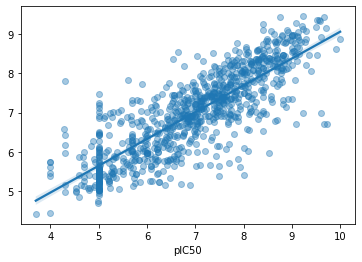

In [88]:
sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})

In [89]:
import pickle

In [82]:
pickle.dump(model2, open('model.pkl','wb'))

In [90]:
model2_df

level_0  index molecule_chembl_id     class  \
0           0      0       CHEMBL269775  inactive   
1           1      1         CHEMBL6683  inactive   
2           2      2         CHEMBL7237  inactive   
3           3      3       CHEMBL269732    active   
4           4      4       CHEMBL266660  inactive   
...       ...    ...                ...       ...   
4523     5020   5107      CHEMBL5218622    active   
4524     5021   5108      CHEMBL5218468    active   
4525     5022   5109      CHEMBL5218453    active   
4526     5023   5110      CHEMBL5218596    active   
4527     5024   5111      CHEMBL5220740    active   

                                   canonical_smiles_new       MW    LogP  \
0     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)C(C)(C)C  352.475  2.0102   
1     CC(CN1CCCCC1)OC(=O)[C@@H]1CCCN1C(=O)C(=O)c1ccccc1  372.465  2.2779   
2          CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCCc1cccnc1  346.427  2.1636   
3     C=CC[C@@H]1/C=C(\C)C[C@H](C)C[C@H](OC)[C@H]2O[...  804.031  4.6390   
4     CC(C)CC(=O)C(=O)N1CCC[C@H]1C(=O)OCCS(=O)(=O)c1...  395.477  1.6097   
...                                                 ...      ...     ...   
4523  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)cc(N4CCOC[C@@H...  434.540  3.7556   
4524  C[C@H]1COCCN1c1cc(N2CCOC[C@@H]2C)c2ccc(-c3ccc(...  477.609  2.8289   
4525  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  464.566  3.2479   
4526  COc1ccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H...  434.540  3.7556   
4527  C[C@H]1COCCN1c1cc2nc(-c3cccc(CO)c3)ccc2c(N2CCO...  434.540  3.2393   

      NumHDonors  NumHAcceptors     pIC50  
0            0.0            5.0  5.000000  
1            0.0            5.0  5.000000  
2            0.0            5.0  5.000000  
3            3.0           12.0  8.500038  
4            0.0            6.0  5.000000  
...          ...            ...       ...  
4523         0.0            7.0  7.000000  
4524         2.0            8.0  7.000000  
4525         1.0            8.0  7.000000  
4526         0.0            7.0  7.000000  
4527         1.0            7.0  7.000000  

[4528 rows x 10 columns]

In [91]:
#model2_df.to_csv('model_data.csv', index=False)

In [92]:
sample_data = X_new.iloc[X_test.index,:].sample(5)

In [93]:
sample_data.index

Int64Index([3493, 3736, 1559, 4454, 1980], dtype='int64')

In [94]:
sample_data.shape

(5, 179)

In [95]:
#sample_data.to_csv('sampled_data.txt', sep='\t', index=False)

In [96]:
#sample = pd.read_csv('sampled_data.txt', sep='\t')
#sample

In [97]:
X_new

PubchemFP3  PubchemFP17  PubchemFP19  PubchemFP20  PubchemFP23  \
0              0            0            1            1            0   
1              1            0            1            1            0   
2              0            0            1            1            0   
3              0            0            1            1            0   
4              0            0            1            1            0   
...          ...          ...          ...          ...          ...   
4523           1            0            1            0            0   
4524           1            0            1            1            0   
4525           0            0            1            0            0   
4526           0            0            1            0            0   
4527           1            1            1            1            1   

      PubchemFP33  PubchemFP143  PubchemFP145  PubchemFP146  PubchemFP150  \
0               0             1             1             1             0   
1               0             1             1             1             0   
2               1             1             1             1             0   
3               1             1             1             1             0   
4               0             1             1             1             0   
...           ...           ...           ...           ...           ...   
4523            0             0             0             0             0   
4524            0             0             0             0             0   
4525            0             0             0             0             0   
4526            0             0             0             0             0   
4527            1             0             0             0             0   

      PubchemFP152  PubchemFP153  PubchemFP179  PubchemFP186  PubchemFP187  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             1             0             0   
3                0             0             1             0             0   
4                0             0             1             0             0   
...            ...           ...           ...           ...           ...   
4523             0             0             1             0             1   
4524             0             0             1             0             1   
4525             0             0             1             0             1   
4526             0             0             1             0             1   
4527             0             0             1             1             1   

      PubchemFP188  PubchemFP194  PubchemFP195  PubchemFP199  PubchemFP201  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
4523             1             1             1             1             1   
4524             1             1             1             1             1   
4525             1             1             1             1             1   
4526             1             1             1             1             1   
4527             1             1             1             1             0   

      PubchemFP202  PubchemFP206  PubchemFP258  PubchemFP260  PubchemFP261  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0            

In [98]:
Xlist = list(X_new.columns)
desc = X[Xlist]
desc.iloc[sample_data.index]


PubchemFP3  PubchemFP17  PubchemFP19  PubchemFP20  PubchemFP23  \
3493           1            1            1            1            1   
3736           0            0            1            0            1   
1559           0            0            1            0            0   
4454           0            0            0            0            1   
1980           0            0            1            0            1   

      PubchemFP33  PubchemFP143  PubchemFP145  PubchemFP146  PubchemFP150  \
3493            0             1             1             1             1   
3736            0             0             0             0             0   
1559            0             1             1             1             1   
4454            0             1             1             1             0   
1980            0             0             0             0             0   

      PubchemFP152  PubchemFP153  PubchemFP179  PubchemFP186  PubchemFP187  \
3493             0             1             1             0             1   
3736             0             0             1             0             1   
1559             1             1             1             0             0   
4454             0             0             1             1             0   
1980             0             0             1             0             1   

      PubchemFP188  PubchemFP194  PubchemFP195  PubchemFP199  PubchemFP201  \
3493             1             0             0             0             0   
3736             1             1             1             1             1   
1559             0             0             0             0             0   
4454             0             0             0             1             0   
1980             1             1             1             1             0   

      PubchemFP202  PubchemFP206  PubchemFP258  PubchemFP260  PubchemFP261  \
3493             0             0             1             0             0   
3736             1             1             1             1             1   
1559             0             0             1             1             1   
4454             0             0             1             0             1   
1980             0             0             1             0             0   

      PubchemFP287  PubchemFP293  PubchemFP299  PubchemFP300  PubchemFP305  \
3493             1             0             1             0             0   
3736             1             0             1             0             0   
1559             0             0             1             1             0   
4454             1             0             0             0             0   
1980             1             0             1             0             0   

      PubchemFP308  PubchemFP338  PubchemFP339  PubchemFP341  PubchemFP346  \
3493             0             0             1             1             1   
3736             0             0             0             1             0   
1559             0             1             0             1             0   
4454             1             0             0             1             0   
1980             0             0             0             0             1   

      PubchemFP353  PubchemFP357  PubchemFP359  PubchemFP364  PubchemFP366  \
3493             0             1             0             1             1   
3736             0             1             0             0             0   
1559             0             1             1             0             0   
4454             0             1             1             1             0   
1980             0             1             0             1             1   

      PubchemFP372  PubchemFP373  PubchemFP374  PubchemFP377  PubchemFP378  \
3493             1             1             1             1             1   
3736             1             1             1             1             0   
1559             0             1             1             1  

In [99]:
vt = pd.read_csv('descriptor_data.csv')

In [100]:
lt = []
lt.append('Name')
lt.extend(X_new.columns)
gt = vt[lt]

In [101]:
gt.to_csv('descriptor_data2.csv',index=False)

In [102]:
import bz2file as bz2

def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f:
        pickle.dump(data, f)

compressed_pickle('model', model2)